In [1]:
from scipy.stats import qmc
import numpy as np
import xarray as xr
import csv
import pandas as pd
import os
import netCDF4 as nc4
from scipy.io import netcdf as nc
import sys
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                     
import shutil                                                                                                                                                       
import tempfile 
import random

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress

nan = float("nan")

#import functions_py.modp as mp
#import fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm

dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

In [9]:
pftnames = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

### Old values

In [13]:
old_fates_allom_agb1 = [0.06896, 0.06896, 0.06896, 0.06896, 0.06896, 0.06896, 
    0.06896, 0.06896, 0.06896, 0.01, 0.01, 0.01 ]

old_fates_allom_agb2 = [0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 
    0.572, 0.572, 0.572, 0.572 ]

old_fates_allom_agb3 = [1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94 ]

old_fates_allom_agb4 = [0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 
    0.931, 0.931, 0.931, 0.931 ]

old_fates_allom_amode = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]

old_fates_allom_blca_expnt_diff = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

old_fates_allom_cmode = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]

old_fates_allom_d2bl1 = [0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 
    0.07, 0.07, 0.07 ]

old_fates_allom_d2bl2 = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 
    1.3 ]

old_fates_allom_d2bl3 = [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 
    0.55, 0.55, 0.55 ]

old_fates_allom_d2ca_coefficient_max = [0.6568464, 0.6568464, 0.6568464, 
    0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 
    0.6568464, 0.6568464, 0.6568464 ]

old_fates_allom_d2ca_coefficient_min = [0.3381119, 0.3381119, 0.3381119, 
    0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 
    0.3381119, 0.3381119, 0.3381119 ]

old_fates_allom_d2h1 = [0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 
    0.64, 0.64, 0.64 ]

old_fates_allom_d2h2 = [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 
    0.37, 0.37, 0.37 ]

old_fates_allom_d2h3 = [-999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, 
    -999.9, -999.9, -999.9, -999.9, -999.9 ]

old_fates_allom_dbh_maxheight = [90, 80, 80, 80, 90, 80, 3, 3, 2, 0.35, 0.35, 0.35 ]

old_fates_allom_lmode = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]

old_fates_allom_hmode = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]

old_fates_wood_density = [0.7, 0.4, 0.7, 0.53, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

### New values

In [14]:
fates_allom_agb1 = [ 0.0673, 0.136401, 0.039306, 0.265369, 0.0673, 0.07287,                                                                                          
    0.06896, 0.06896, 0.06896, 0.01, 0.01, 0.01 ]

fates_allom_agb2 = [0.976, 0.944904, 1.087335, 0.832132, 0.976, 1.037321, 0.572, 0.572,                                                                             
    0.572, 0.572, 0.572, 0.572]

fates_allom_amode = [3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1 ]

fates_allom_blca_expnt_diff = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

fates_allom_cmode = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]

fates_allom_d2bl1 = [ 0.07, 0.12, 0.07, 0.03, 0.04, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]

fates_allom_d2bl2 = [1.481968, 1.183437, 0.985124, 1.742140, 1.481968, 1.049894,                                                                                    
    1.3, 1.3, 1.3, 1.3, 1.3, 1.3 ]

fates_allom_d2bl3 = [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 
    0.55, 0.55, 0.55 ]

fates_allom_d2ca_coefficient_max = [0.271589, 0.369372, 1.078726, 0.057930,                                                                                         
    0.271589, 1.155361, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464 ]

fates_allom_d2ca_coefficient_min = [0.271589, 0.369372, 1.078726, 0.057930,                                                                                         
    0.271589, 1.155361, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464]

fates_allom_d2h1 = [78.40877, 306.842667, 106.874582, 104.358684, 78.40877, 31.455705,                                                                              
    0.64, 0.64, 0.64, 0.64, 0.64, 0.64 ]

fates_allom_d2h2 = [0.812438, 0.752377, 0.94713, 1.114697, 0.812438, 0.973409, 0.37, 0.37, 0.37,                                                                    
    0.37, 0.37, 0.37 ]

fates_allom_d2h3 = [47.666616, 196.686569, 93.979046, 160.683509, 47.666616, 16.592817, -999.9,                                                                     
    -999.9, -999.9, -999.9, -999.9, -999.9 ]

fates_allom_dbh_maxheight = [1000, 1000, 1000, 1000, 1000, 1000, 3, 3, 2, 0.35, 0.35, 0.35 ]

fates_allom_lmode = [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1 ]

fates_allom_hmode = [5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1 ]

fates_wood_density = [0.548327, 0.442350, 0.454845, 0.754336, 0.548327, 0.566452,0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

### Functions

In [15]:
def d2hmc (d, p1, p2, p3) :
    h = (p1 * d**p2) / (p3 + d**p2)
    return h

def d2h_obrien (d, p1, p2, dbh_maxh) :
    dbh = min(d, dbh_maxh)
    h = 10 ** (np.log10(dbh) * p1+p2)
    return h

def dh2bagw_salda (d, h, p1, p2, p3, wd, p4)  :
    agb = 0.6*p1*(h**p2)*(d**p3)*(wd**p4)
    return agb

def dh2bagw_chave2014 (d, h, p1, p2, wd )  :
    agb = (p1 * (wd*d**2.0*h)**p2)/ 2.0
    return agb

def carea_2pwr (d, p1, p2 ) :
    ca = p1 * d ** p2
    return ca

def d2blmax_salda (d, p1, p2,  p3, wd, dbh_maxh) :
    dbh =  min(d, dbh_maxh)
    blmax = p1 * dbh**p2 * wd**p3
    return blmax

def d2blmax_2pwr (d, p1, p2) : 
    blmax = (p1*d**p2) / 2.0
    return blmax

### Crown area allometries

''

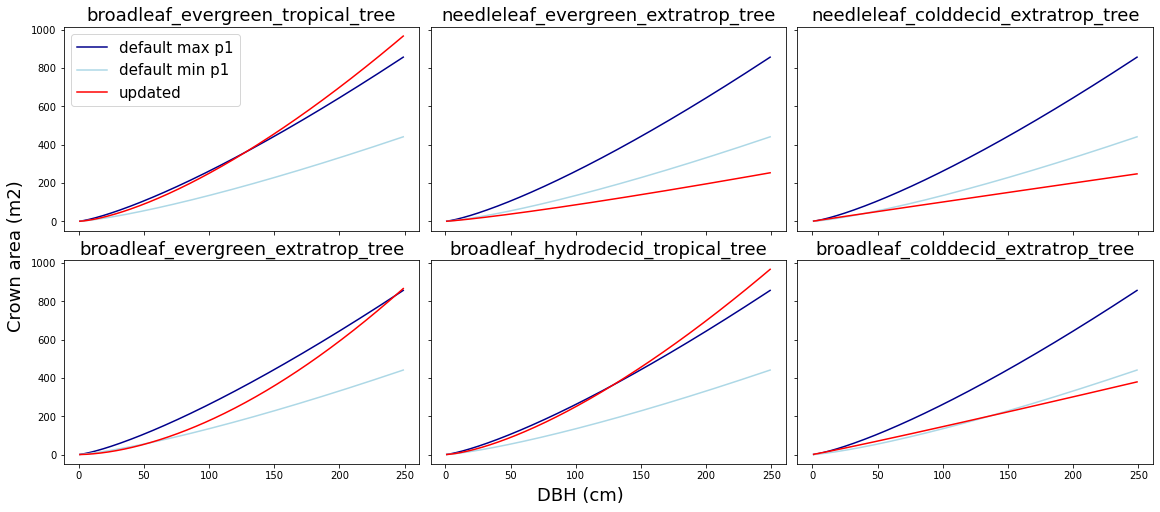

In [16]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

for pf in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
    
    # calculate crown area - old max
    ca_curve_old_max = [carea_2pwr(d, old_fates_allom_d2ca_coefficient_max[pf],  old_fates_allom_d2bl2[pf])  for  d  in dbh]
     # calculate crown area - old max
    ca_curve_old_min = [carea_2pwr(d, old_fates_allom_d2ca_coefficient_min[pf],  old_fates_allom_d2bl2[pf])  for  d  in dbh]
    
    ca_curve_new = [carea_2pwr(d, fates_allom_d2ca_coefficient_min[pf],  fates_allom_d2bl2[pf])  for  d  in dbh]
    
    
    axs[pf].plot(dbh, ca_curve_old_max, color='darkblue', label = 'default max p1')
    axs[pf].plot(dbh, ca_curve_old_min, color='lightblue', label = 'default min p1')
    axs[pf].plot(dbh, ca_curve_new, color='red', label = 'updated')
    
    axs[pf].set_title(pftnames[pf], fontsize=18)

axs[0].legend(fontsize=15)
fig2.supylabel('Crown area (m2)', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;

### Leaf biomass allometries

''

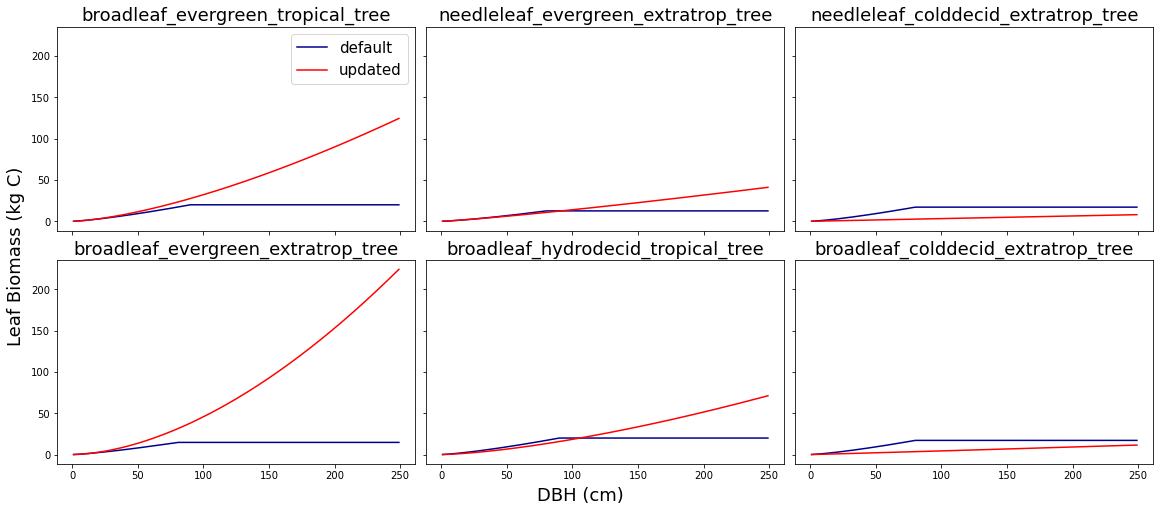

In [17]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

for pf in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
    
    bleaf_curve_old = [d2blmax_salda(d, old_fates_allom_d2bl1[pf], old_fates_allom_d2bl2[pf], old_fates_allom_d2bl3[pf], 
                                    old_fates_wood_density[pf],old_fates_allom_dbh_maxheight[pf] )  for d in dbh]
    
    bleaf_curve_new = [d2blmax_2pwr(d, fates_allom_d2bl1[pf], fates_allom_d2bl2[pf])  for d in dbh]
    
    
    axs[pf].plot(dbh, bleaf_curve_old, color='darkblue', label = 'default')
    axs[pf].plot(dbh, bleaf_curve_new, color='red', label = 'updated')
    
    axs[pf].set_title(pftnames[pf], fontsize=18)

axs[0].legend(fontsize=15)
fig2.supylabel('Leaf Biomass (kg C)', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;

### Height 

''

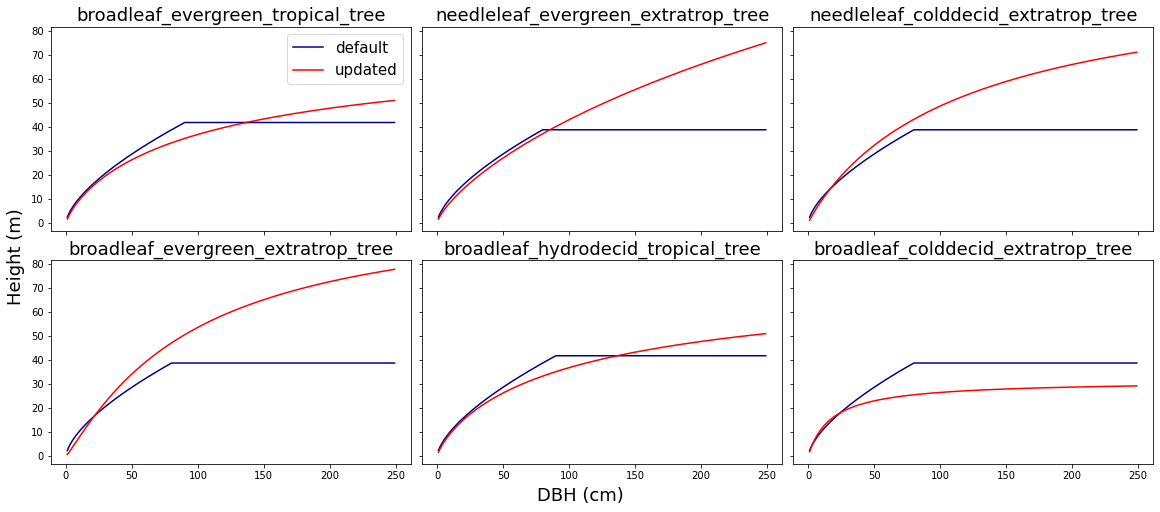

In [18]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

for pf in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
      
    h_curve_old = [d2h_obrien(d, old_fates_allom_d2h1[pf], old_fates_allom_d2h2[pf], 
                              old_fates_allom_dbh_maxheight[pf])  for d in dbh]
    
    h_curve_new = [d2hmc(d, fates_allom_d2h1[pf], fates_allom_d2h2[pf], fates_allom_d2h3[pf])  for d in dbh]
    
    
    axs[pf].plot(dbh, h_curve_old, color='darkblue', label = 'default')
    axs[pf].plot(dbh, h_curve_new, color='red', label = 'updated')
    
    axs[pf].set_title(pftnames[pf], fontsize=18)

axs[0].legend(fontsize=15)
fig2.supylabel('Height (m)', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;

### AGB 

''

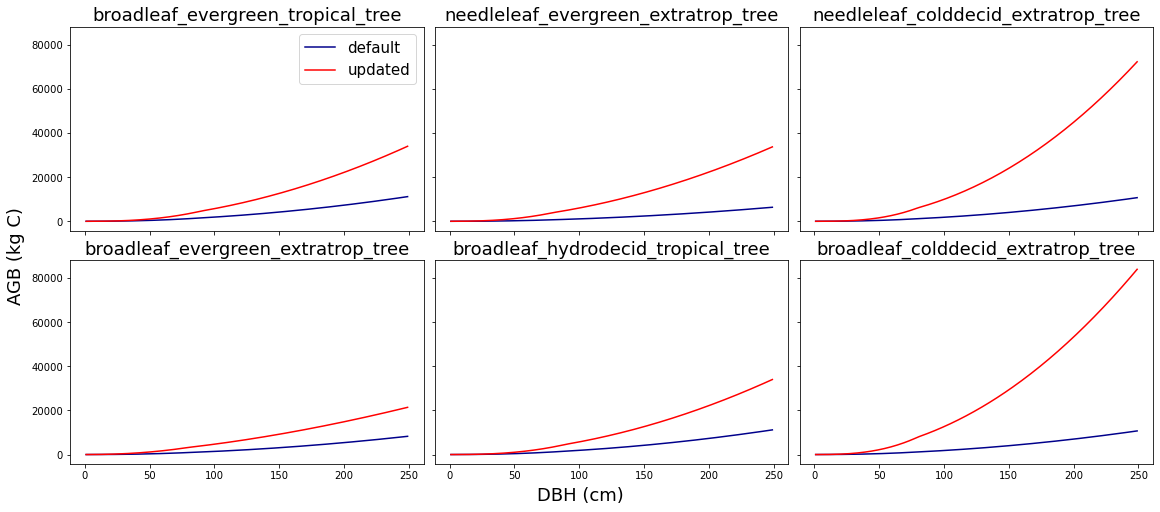

In [19]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

for pf in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
    
    h_curve_old = [d2h_obrien(d, old_fates_allom_d2h1[pf], old_fates_allom_d2h2[pf], 
                              old_fates_allom_dbh_maxheight[pf])  for d in dbh]
    agb_curve_old = [dh2bagw_salda(d, h, old_fates_allom_agb1[pf], old_fates_allom_agb2[pf],  
                                  old_fates_allom_agb3[pf], old_fates_wood_density[pf],
                                   old_fates_allom_agb4[pf]) for d,h  in zip(dbh, h_curve_old)]
    #dh2bagw_chave2014 (d, h, p1, p2, wd )  :
    
    h_curve_new = [d2hmc(d, fates_allom_d2h1[pf], fates_allom_d2h2[pf], fates_allom_d2h3[pf])  for d in dbh]
    agb_curve_new = [dh2bagw_chave2014(d, h, fates_allom_agb1[pf], fates_allom_agb2[pf],  
                                 fates_wood_density[pf]) for d,h  in zip(dbh, h_curve_old)]
    
    
    axs[pf].plot(dbh, agb_curve_old, color='darkblue', label = 'default')
    axs[pf].plot(dbh, agb_curve_new, color='red', label = 'updated')
    
    axs[pf].set_title(pftnames[pf], fontsize=18)

axs[0].legend(fontsize=15)
fig2.supylabel('AGB (kg C)', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;

### Individual LAI 

In [20]:
def decay_coeff_kn ( vcmax25top ) :
    kn = np.exp(0.00963 * vcmax25top  - 2.43)
    return kn

In [21]:
def tree_lai ( leaf_c, c_area, vcmax25top, slatop, slamax) :
    
    g_per_kg = 1000.0
    slat = g_per_kg * slatop
    leafc_per_unitarea = leaf_c / c_area
    canopy_lai_above = 0
        
    kn = decay_coeff_kn(vcmax25top)
    sla_max = g_per_kg * slamax
    leafc_slamax = (slat - sla_max * np.exp(-1.0 * kn * canopy_lai_above)) / (
        -1.0 * kn * slat * sla_max) 
    
    if (leafc_per_unitarea <= leafc_slamax) : 
        tree_lai = (np.log (np.exp(-1 * kn * canopy_lai_above) - kn * slat  * leafc_per_unitarea) + 
                    (kn * canopy_lai_above)) / (-1 * kn)
    else : 
        tree_lai = ((np.log (np.exp(1 * kn * canopy_lai_above) - kn * slat * leafc_slamax) + 
                     (kn * canopy_lai_above)) / (-1 * kn))  +  (leafc_per_unitarea -
                                                                leafc_slamax) * sla_max
        
    return tree_lai

In [22]:
vcmax25top  = [50, 62, 39, 61, 58, 58, 62, 54, 54, 78, 78, 78]
nitr_stoich  = [0.033, 0.029, 0.04, 0.033, 0.04, 0.04, 0.033, 0.04, 0.04, 0.04, 0.04, 0.04]
slatop = [0.018, 0.006, 0.0288, 0.0108, 0.036, 0.036, 0.0144, 0.036, 0.036, 0.036, 0.036, 0.03]
slamax= [0.0954, 0.0954, 0.0954, 0.0954, 0.0954, 0.0954, 0.012, 0.03, 0.03, 0.03, 0.03, 0.03]
lnc_top =  [a / b for a,  b  in  zip(nitr_stoich,  slatop)]
umolC_to_kgC = 12.0e-9
g_per_kg = 1000.0

''

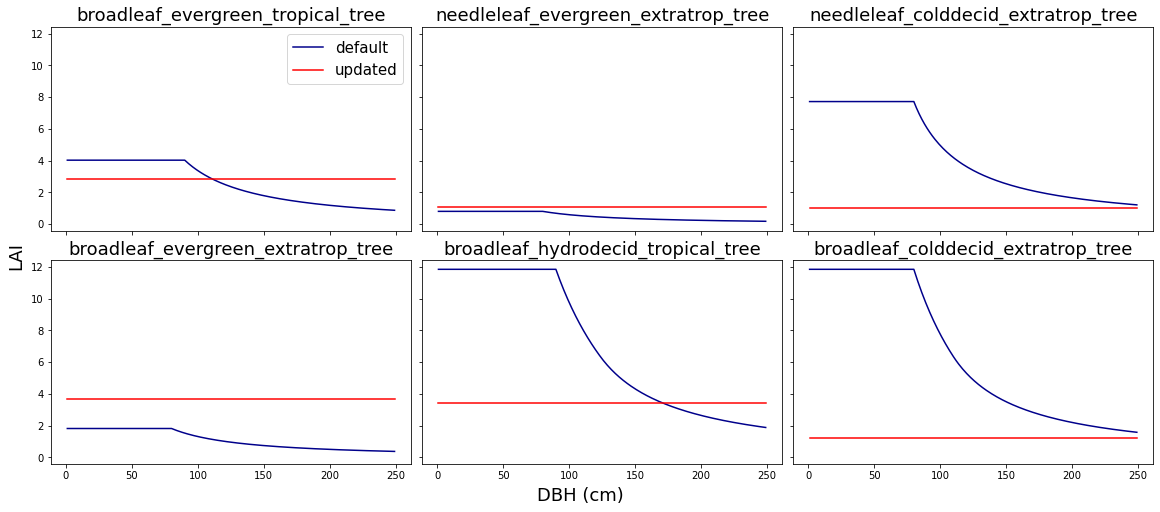

In [24]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

# for each tree PFT calculate total vai
for pf in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
    
    ### OLD
    # calculate leaf carbon 
    bleaf_curve_old = [d2blmax_salda(d, old_fates_allom_d2bl1[pf], old_fates_allom_d2bl2[pf], old_fates_allom_d2bl3[pf], 
                                    old_fates_wood_density[pf],old_fates_allom_dbh_maxheight[pf] )  for d in dbh]
    
    # calculate crown area
    ca_curve_old_min = [carea_2pwr(d, old_fates_allom_d2ca_coefficient_min[pf],  old_fates_allom_d2bl2[pf])  for  d  in dbh]
    # LAI
    lai_curve_old = [tree_lai( leaf_c, c_area, vcmax25top[pf], slatop[pf], slamax[pf])
             for leaf_c, c_area in zip(bleaf_curve_old, ca_curve_old_min)]
    
    ### NEW
    bleaf_curve_new = [d2blmax_2pwr(d, fates_allom_d2bl1[pf], fates_allom_d2bl2[pf])  for d in dbh]
    ca_curve_new = [carea_2pwr(d, fates_allom_d2ca_coefficient_min[pf],  fates_allom_d2bl2[pf])  for  d  in dbh]
    # LAI
    lai_curve_new = [tree_lai( leaf_c, c_area, vcmax25top[pf], slatop[pf], slamax[pf])
             for leaf_c, c_area in zip(bleaf_curve_new, ca_curve_new)]
    
    axs[pf].plot(dbh, lai_curve_old, color='darkblue', label='default')
    axs[pf].plot(dbh, lai_curve_new, color='red', label='updated')
    axs[pf].set_title(pftnames[pf], fontsize=18)

axs[0].legend(fontsize=15)    
fig2.supylabel('LAI', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;